# MIF04 Apprentissage et Analyse de données

Année 2022-2023

## Atelier 1 : Apprentissage non supervisé avec Python

------------------------

NGUYEN Cecilia p1908025

ENG Charles p1403762

TANG Kévin p1501263

In [ ]:
import numpy as np
np.set_printoptions(threshold=10000,suppress=True)
import pandas as pd
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [ ]:
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Exercice 1

## Question 1

In [ ]:
data = pd.read_csv('./villes.csv', sep=';')
X = data.iloc[:, 1:13].values
labels = data.iloc[:, 0].values

## Question 2

In [ ]:
scaler = StandardScaler()
scaled = scaler.fit_transform(X)
print(scaled)

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(scaled)
print(X_pca)

In [ ]:
print(pca.explained_variance_ratio_)

[0.87268193 0.11720602]


**Question 2.1** : Nombre d’axes à retenir pour conserver un minimum de 90% de l’information

---

2 car la somme des 2 premiers axes est supérieure à 0.90

**Question 2.2** : Interprétation des deux premiers axes principaux

---

Pour l'axe des X : les villes les plus au sud (resp. nord) ont des températures plus chaudes (resp. froides).

Pour l'axe des Y : les villes où la température fortement dans l'année sont placées plus haut sur l'axe, tandis que ceux où la température est plutôt stable sont en bas.

**Question 2.3** : Visualisation graphique des villes projetées dans le plan
principal

---



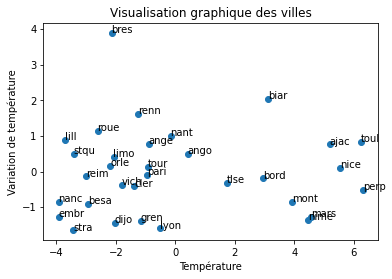

In [ ]:
import matplotlib
plt.scatter(X_pca[:, 0], X_pca[:, 1])
for label, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
 plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
plt.title("Visualisation graphique des villes")
plt.xlabel("Température")
plt.ylabel("Variation de température")
plt.show()

In [ ]:
print(pca.components_)

[[ 0.27151028  0.28846164  0.3010811   0.30354174  0.28353089  0.27841907
   0.27290295  0.28757774  0.30472022  0.3038548   0.29242808  0.2729549 ]
 [ 0.39933494  0.29907184  0.12943051 -0.11530598 -0.32314291 -0.35846763
  -0.38879639 -0.3010133  -0.11231622  0.12249226  0.26269461  0.38693688]]


## Question 3

In [ ]:
data = pd.read_csv('./crimes.csv', sep=';')
X = data.iloc[:, 1:8].values
labels = data.iloc[:, 0].values

In [ ]:
scaler = StandardScaler()
scaled = scaler.fit_transform(X)
print(scaled)

In [ ]:
pca = PCA(4)
X_pca = pca.fit_transform(scaled)
print(X_pca)

In [ ]:
print(pca.explained_variance_ratio_)

[0.58785136 0.17696026 0.10368809 0.04520458]


**Question 3.1** : Nombre d’axes à retenir pour conserver un minimum de 90% de l’information

---

4 car la somme des 4 premiers axes est supérieure à 0.90

**Question 3.2** : Interprétation des deux premiers axes principaux

---

Pour l'axe des X : plus les états sont vers la droite, plus leur nombre de crimes est élevé.

Pour l'axe des Y : plus les états sont vers le haut, plus le taux de crimes graves est elevé.

**Question 3.3** : Visualisation graphique des états projetés dans le plan
principal

---



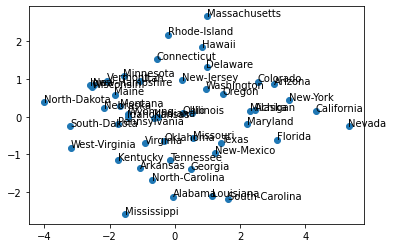

In [ ]:
import matplotlib
plt.scatter(X_pca[:, 0], X_pca[:, 1])
for label, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
 plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
plt.show()

In [ ]:
print(pca.components_)

[[ 0.30027916  0.43175936  0.39687549  0.3966517   0.44015721  0.35735953
   0.29517681]
 [-0.62917444 -0.16943512  0.04224698 -0.34352815  0.20334059  0.40231912
   0.50242093]
 [ 0.1782453  -0.24419758  0.49586087 -0.06950972 -0.20989509 -0.53923144
   0.56838373]
 [-0.23211411  0.06221567 -0.55798926  0.62980445 -0.05755491 -0.23488987
   0.41923832]]


## Question 4

In [ ]:
data = pd.read_csv('./50_Startups.csv', sep=';')
X = data.iloc[:, 1:5].values
labels = data.iloc[:, 0].values

In [ ]:
scaler = StandardScaler()
scaled = scaler.fit_transform(X)
print(scaled)

In [ ]:
pca = PCA()
X_pca = pca.fit_transform(scaled)
print(X_pca)

In [ ]:
print(pca.explained_variance_ratio_)

[0.66804393 0.25484695 0.07063561 0.00647351]


**Question 4.1** : Nombre d’axes à retenir pour conserver un minimum de 90% de l’information

---

2 car la somme des 2 premiers axes est supérieure à 0.90

**Question 4.2** : Interprétation des deux premiers axes principaux

---

Pour l'axe des X : les startups les plus à droite ont fait le plus de bénéfices

Pour l'axe des Y : les startups les plus en haut ont en moyenne plus dépensé que celles en bas de l'axe

**Question 4.3** : Visualisation graphique des états projetés dans le plan
principal

---



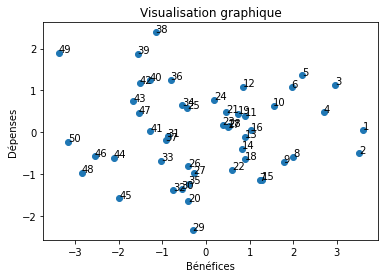

In [ ]:
import matplotlib
plt.scatter(X_pca[:, 0], X_pca[:, 1])
for label, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
 plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
plt.title("Visualisation graphique")
plt.xlabel("Bénéfices")
plt.ylabel("Dépenses")
plt.show()

# Exercice 2

In [ ]:
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

## Question 1

In [ ]:
data = pd.read_csv('./villes.csv', sep=';')
X = data.iloc[:, 1:13].values
labels = data.iloc[:, 0].values

In [ ]:
scaler = StandardScaler()
scaled = scaler.fit_transform(X)

print(scaled)

In [ ]:
pca = PCA()
X_pca = pca.fit_transform(scaled)
print(X_pca)

In [ ]:
clustering = KMeans(n_clusters=3).fit_predict(X_pca)

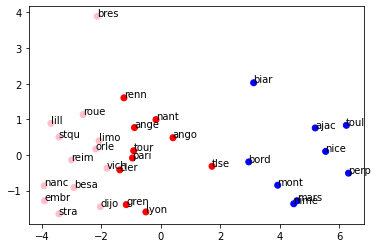

In [ ]:
colors = ['red','yellow','blue','pink']
plt.scatter(X_pca[:, 0], X_pca[:, 1], c= clustering, cmap=matplotlib.colors.ListedColormap(colors))
for label, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
 plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
plt.show()

## Question 2

Avec le critère **ward**.

In [ ]:
clustering_ward = AgglomerativeClustering(n_clusters=3, linkage='ward').fit_predict(X_pca)

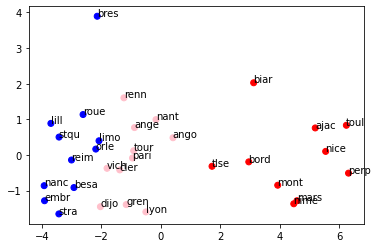

In [ ]:
colors = ['red','yellow','blue','pink']
plt.scatter(X_pca[:, 0], X_pca[:, 1], c= clustering_ward, cmap=matplotlib.colors.ListedColormap(colors))
for label, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
 plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
plt.show()

Avec le critère **average**.

In [ ]:
clustering_average = AgglomerativeClustering(n_clusters=3, linkage='average').fit_predict(X_pca)

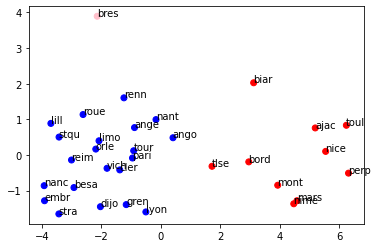

In [ ]:
colors = ['red','yellow','blue','pink']
plt.scatter(X_pca[:, 0], X_pca[:, 1], c= clustering_average, cmap=matplotlib.colors.ListedColormap(colors))
for label, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
 plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
plt.show()

## Question 3

In [ ]:
from sklearn import metrics
for i in np.arange(2, 6):
 clustering = KMeans(n_clusters=i).fit_predict(X)
 print(metrics.silhouette_score(X, clustering,metric='euclidean'))
 print()

0.6181156437258204

0.40912000832289414

0.32923538637081096

0.33116954226736833



**Question 3** : Déduire la meilleure
partition qui correspond à un indice maximal pour l’indice Silhouette.

---

L'indice maximal est obtenu pour 2 clusters (soit 0.6181156437258204)

## Question 4



In [ ]:
clustering_ward = AgglomerativeClustering(n_clusters=3, linkage='ward').fit_predict(X_pca)
score = silhouette_score(X_pca, clustering_ward)
print(score)

0.3680782608000546


In [ ]:
clustering_average = AgglomerativeClustering(n_clusters=3, linkage='average').fit_predict(X_pca)
score = silhouette_score(X_pca, clustering_average)
print(score)

0.4956874462691089


**Question 4 :** Quelle est le meilleur algorithme à utiliser pour obtenir 3 clusters ?

---

Le meilleur algorithme pour obtenir 3 clusters est le AgglomerativeClustering avec le critère d'aggrégation average.